### Import Dataset

In [60]:
import pandas as pd

# Load the dataset
file_path = "flu.csv"
df = pd.read_csv(file_path)

# Display basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

(None,
   Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
 0      H1N1                 NaN  67.0   F         NaN   
 1      H1N1                 NaN  29.0   M         NaN   
 2      H1N1                 NaN  22.0   F         NaN   
 3      H1N1                 NaN  20.0   F         NaN   
 4      H1N1                 NaN  21.0   M         NaN   
 
    serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
 0                          NaN          NaN                    NaN   
 1                          NaN          NaN                    NaN   
 2                          NaN          NaN                    NaN   
 3                          NaN          NaN                    NaN   
 4                          NaN          NaN                    NaN   
 
    DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
 0                NaN           NaN         NaN                NaN      NaN   
 1                NaN           NaN         NaN          


Dataset berisi 1482 baris dan 20 kolom. Banyak kolom memiliki nilai hilang (missing values) dalam jumlah besar. Beberapa kolom penting dan persentase non-null:
- Diagnosis (target potensial): 100%
- Age: 98%
- Sex: 95%
- Fever, Coughing, Fatigue: sekitar 35–60%

Kolom seperti `neutrophil`, `serumLevelsOfWhiteBloodCell`, dan `DurationOfIllness` memiliki <10% data.

---

### Visualasi dan Penanganan Missing Values

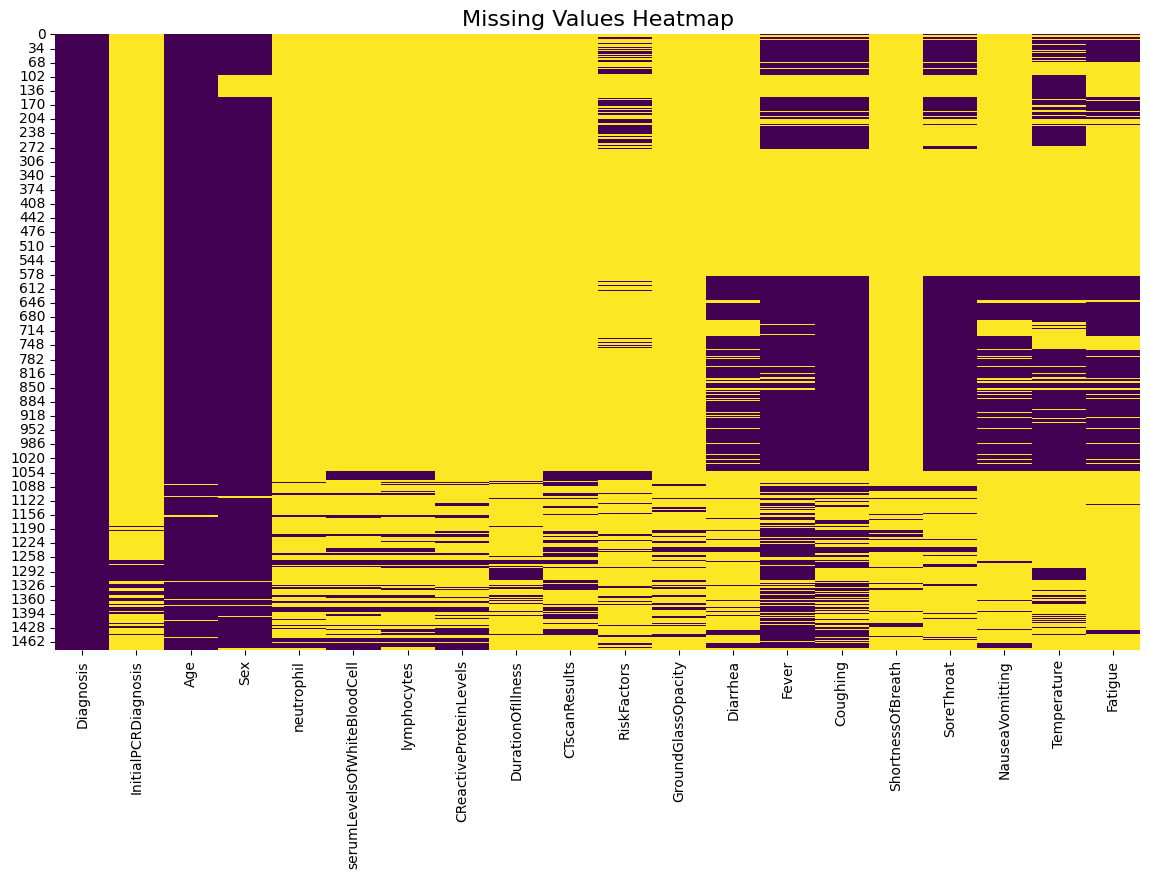

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()


Visualisasi heatmap menunjukkan bahwa banyak kolom memiliki missing values yang signifikan. Kolom seperti InitialPCRDiagnosis, neutrophil, serumLevelsOfWhiteBloodCell, dan DurationOfIllness hampir sepenuhnya kosong.
Langkah berikut:
1. Hapus kolom dengan lebih dari 70% missing values.
2. Imputasi:
  - Numerik → gunakan median.
  - Kategorikal → gunakan modus.
3. Ubah Diagnosis menjadi label numerik untuk klasifikasi.

In [62]:
# Hitung persentase missing values
missing_percent = df.isnull().mean()

# Hapus kolom dengan lebih dari 70% missing values
cols_to_drop = missing_percent[missing_percent > 0.7].index.tolist()
df_cleaned = df.drop(columns=cols_to_drop)

# Pisahkan kolom numerik dan kategorikal yang tersisa
num_cols = df_cleaned.select_dtypes(include=['float64']).columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.drop("Diagnosis")

# Imputasi median untuk numerik
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Imputasi modus untuk kategorikal
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Encode target kolom Diagnosis menjadi numerik
df_cleaned["Diagnosis"] = df_cleaned["Diagnosis"].astype("category").cat.codes

# Tampilkan informasi setelah pembersihan
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Diagnosis    1482 non-null   int8   
 1   Age          1482 non-null   float64
 2   Sex          1482 non-null   object 
 3   Diarrhea     1482 non-null   object 
 4   Fever        1482 non-null   object 
 5   Coughing     1482 non-null   object 
 6   SoreThroat   1482 non-null   object 
 7   Temperature  1482 non-null   float64
 8   Fatigue      1482 non-null   object 
dtypes: float64(2), int8(1), object(6)
memory usage: 94.2+ KB


Dataset telah dibersihkan dan disederhanakan menjadi 9 fitur relevan yang lengkap tanpa missing values. Kolom Diagnosis telah diubah menjadi format numerik dan akan digunakan sebagai target klasifikasi.
Kolom tersisa:
- Numerik: Age, Temperature
- Kategorikal: Sex, Diarrhea, Fever, Coughing, SoreThroat, Fatigue
- Target: Diagnosis (0 = H1N1, 1 = COVID-19, dst sesuai mapping kategori asli)

---

### Exploratory Data Analysis

1. **Gunakan data yang sudah dibersihkan**

In [63]:
df = df_cleaned

2. **Menentukan Target**

In [64]:
# Diagnosis jadi target karena 100% tersedia
df["Diagnosis"] = df["Diagnosis"].astype("category").cat.codes

3. **Label Encoding**

In [65]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = label_enc.fit_transform(df[col])


4. **EDA dan Visualisasi**

Heatmap akan berwarna ungu penuh karena seluruh kolom sudah dipilah dan dirubah menjadi bentuk numerik.

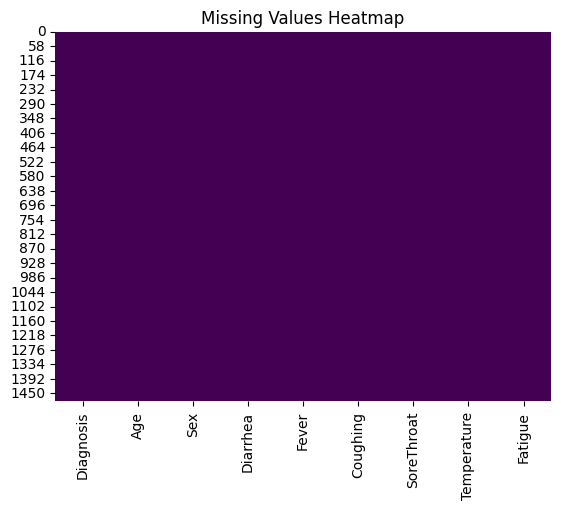

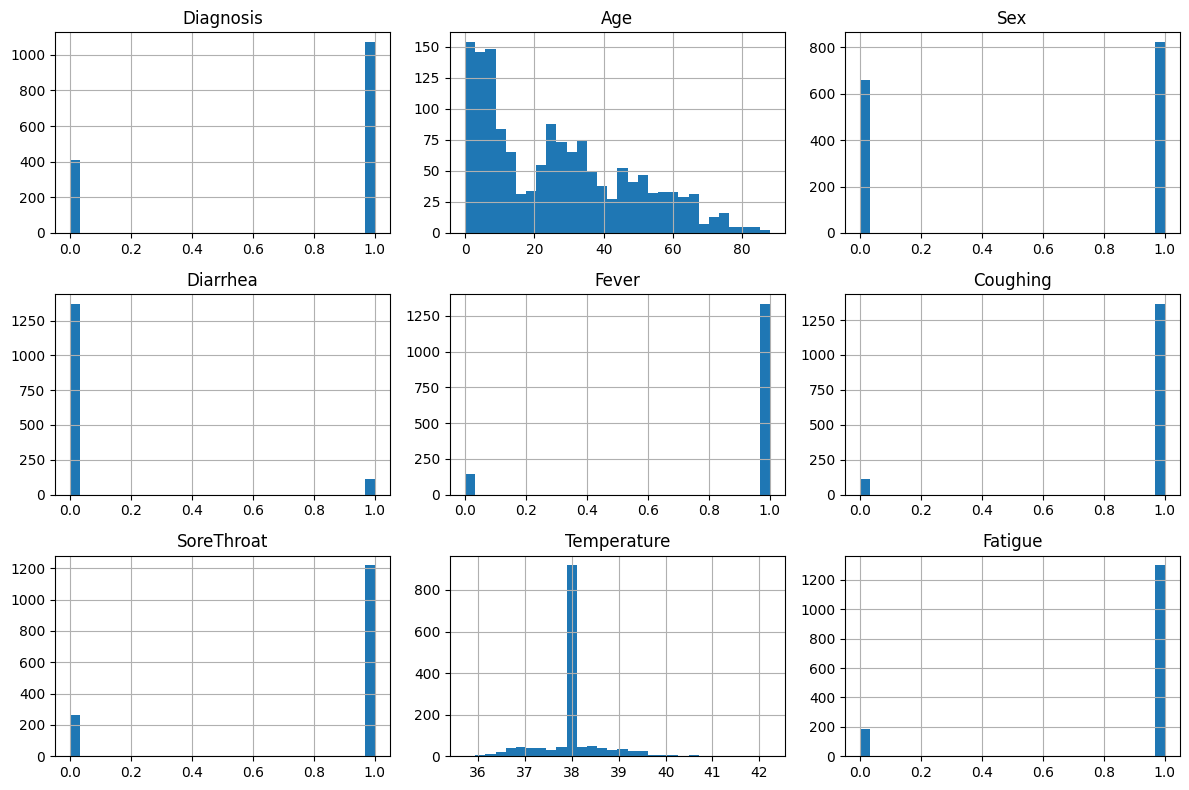

In [66]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")

# Distribusi fitur numerik
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()


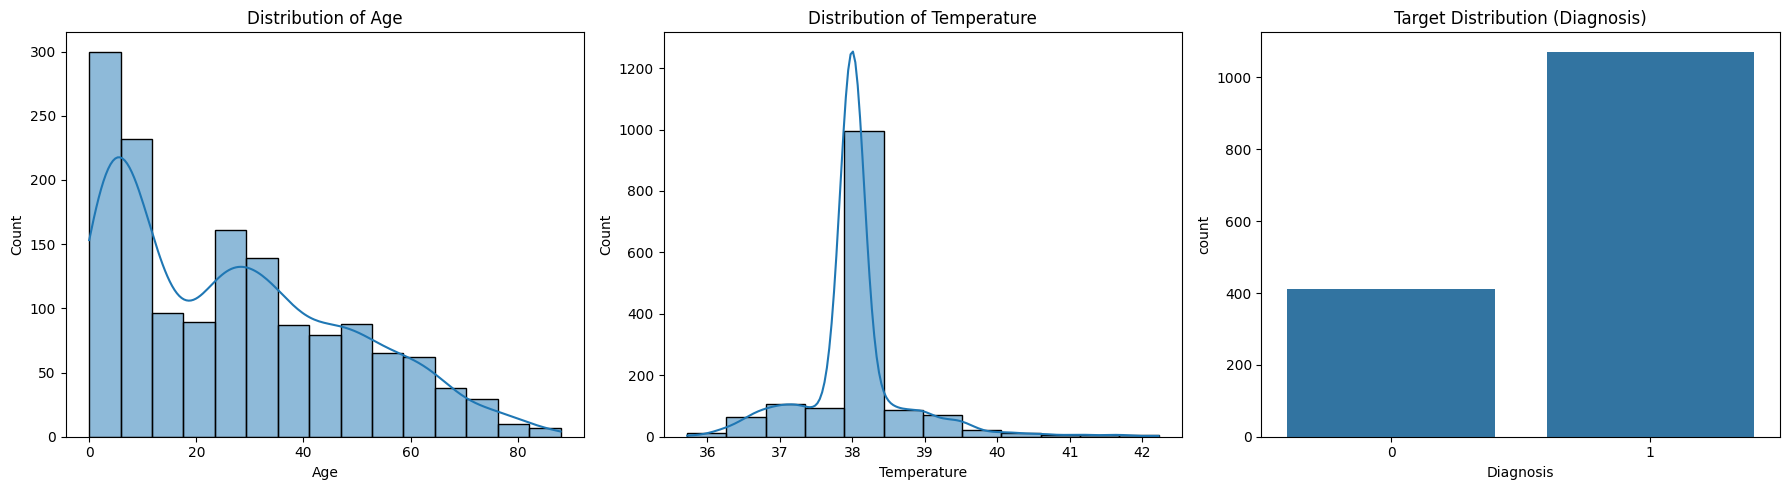

In [67]:
# Salin dataframe
df_encoded = df.copy()

# Label Encoding untuk semua fitur kategorikal
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Visualisasi distribusi fitur numerik dan target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_encoded["Age"], kde=True, ax=axes[0]).set_title("Distribution of Age")
sns.histplot(df_encoded["Temperature"], kde=True, ax=axes[1]).set_title("Distribution of Temperature")
sns.countplot(x="Diagnosis", data=df_encoded, ax=axes[2]).set_title("Target Distribution (Diagnosis)")
plt.tight_layout()
plt.show()


### Matriks Evaluasi Akurasi, Presisi, Recall, F1-Score, dan ROC-AUC.

Berikut adalah semua **rumus evaluasi klasifikasi** yang digunakan dalam kode sebelumnya, lengkap dengan penjelasan:

1. **Akurasi (Accuracy)**  
Ukuran seberapa banyak prediksi yang benar dibanding total prediksi.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- $TP$: True Positive  
- $TN$: True Negative  
- $FP$: False Positive  
- $FN$: False Negative  

2. **Presisi (Precision)**  
Mengukur seberapa banyak prediksi positif yang benar-benar positif.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- Presisi tinggi berarti sedikit **False Positive**.

3. **Recall (Sensitivity / True Positive Rate)**  
Seberapa banyak kasus positif yang berhasil dikenali model.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- Recall tinggi berarti sedikit **False Negative**.

4. **F1 Score**  
Rata-rata harmonik dari presisi dan recall, berguna saat terjadi ketidakseimbangan kelas.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- F1 mendekati 1 berarti presisi dan recall seimbang dan tinggi.

5. **ROC-AUC (Receiver Operating Characteristic – Area Under Curve)**  
Mengukur kemampuan model membedakan antara kelas. Nilainya antara 0.5 (acak) hingga 1.0 (sempurna).

$$
\text{AUC} = \int_0^1 \text{TPR}(FPR) \, dFPR
$$

Diukur dengan:
- $TPR$ (Recall): $\frac{TP}{TP + FN}$
- $FPR$: $\frac{FP}{FP + TN}$

Akurasi:         0.7845117845117845
Presisi:         0.7832028418152819
Recall:          0.7845117845117845
F1 Score:        0.7838191770776041
ROC AUC Score:   0.8032474503488995


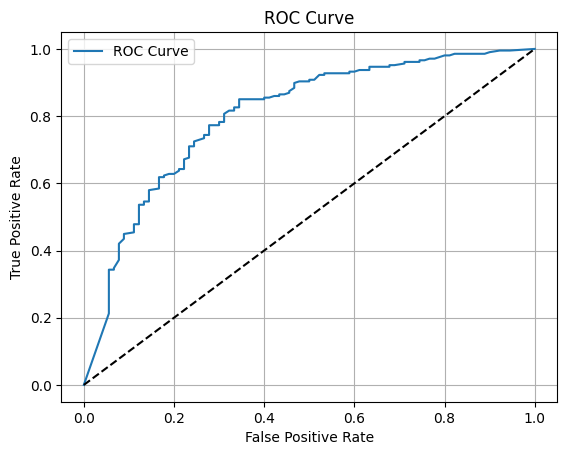

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_proba = [float(x[1]) for x in model.predict_proba(X_test)]

# Evaluasi
print("Akurasi:        ", accuracy_score(y_test, y_pred))
print("Presisi:        ", precision_score(y_test, y_pred, average='weighted'))
print("Recall:         ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:       ", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC Score:  ", roc_auc_score(y_test, y_proba, multi_class='ovr'))

# ROC Curve (untuk 2 kelas saja)
if len(y.unique()) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()


### Analisis Hasil Evaluasi Model
**1. Akurasi: 78.45%**
- Artinya: 78.45% dari seluruh prediksi model sesuai dengan label sebenarnya.
- **Catatan**: Akurasi ini cukup baik, namun tidak boleh dijadikan satu-satunya acuan, terutama jika terjadi ketidakseimbangan kelas.

**2. Presisi: 78.32%**
- Artinya: Dari semua prediksi positif yang dibuat oleh model, 78.32% benar-benar positif.
- **Interpretasi**: Model tidak terlalu banyak menghasilkan **False Positive**.
- **Penting jika**: Salah diagnosis positif (false alarm) berbahaya, misalnya salah deteksi COVID-19.

**3. Recall: 78.45%**
- Artinya: Dari semua kasus positif yang sebenarnya, model berhasil menangkap 78.45%.
- **Interpretasi**: Model tidak terlalu banyak melewatkan kasus positif (**False Negative** sedikit).
- **Penting jika**: Lebih berisiko jika gagal mendeteksi pasien yang sebenarnya terinfeksi.

**4. F1 Score: 78.38%**
- Artinya: Presisi dan recall berada dalam keseimbangan yang cukup baik.
- **F1 mendekati akurasi dan recall**, yang menunjukkan distribusi prediksi model stabil dan tidak berat sebelah.

**5. ROC AUC Score: 80.32%**
- Artinya: Model memiliki kemampuan 80.32% dalam membedakan antara kelas positif dan negatif secara umum.
- **Interpretasi**: Ini metrik yang kuat, karena mempertimbangkan seluruh ambang batas klasifikasi. Nilai >0.8 menunjukkan model tergolong **baik** dalam diskriminasi antar kelas.

### Kesimpulan:
- Model sudah cukup **akurat, stabil, dan seimbang**.
- Tidak terlalu bias ke salah satu kelas.
- Jika dataset memiliki banyak fitur kategorikal dan sedikit outlier, hasil ini sudah cukup solid.
- Untuk peningkatan:
  - Coba tuning hyperparameter (`RandomizedSearchCV`, `GridSearchCV`).
  - Uji model lain: **XGBoost**, **Logistic Regression**, atau **LightGBM**.
  - Periksa distribusi kelas (imbalance? pakai `SMOTE` jika ya).